<a href="https://colab.research.google.com/github/joybratas1/cubic_zincornia/blob/main/Joy_Cubic_zirconia_DiamondPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DIAMOND PRICE PREDICTION USING LINEAR REGRESSION

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # counter takes values returns value_counts dictionary
import seaborn as sns
from sklearn.impute import SimpleImputer
plt.style.use('ggplot')
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [244]:
file_name='/content/cubic_zirconia.csv'

In [285]:
df= pd.read_csv(file_name)

In [286]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


Checking Null Values

In [287]:
df.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [288]:
missing_col=['depth']
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()


In [289]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [290]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [291]:
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


Variables

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [293]:
df= df.drop('Unnamed: 0', axis=1)

In [294]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

Checking Duplicate

In [295]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 34
(26967, 10)


In [296]:
df.drop_duplicates(inplace=True) 
print('After',df.shape)

After (26933, 10)


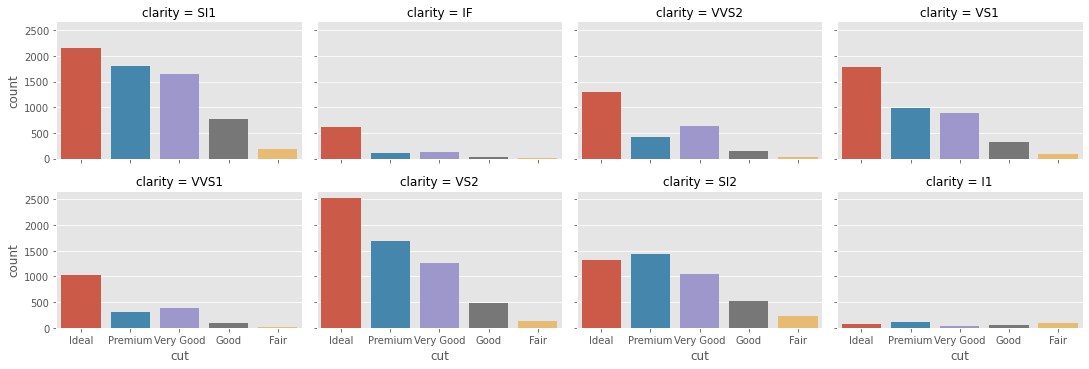

In [297]:
g = sns.catplot(x="cut", col="clarity", col_wrap=4,
                data=df,
                kind="count", height=2.5, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


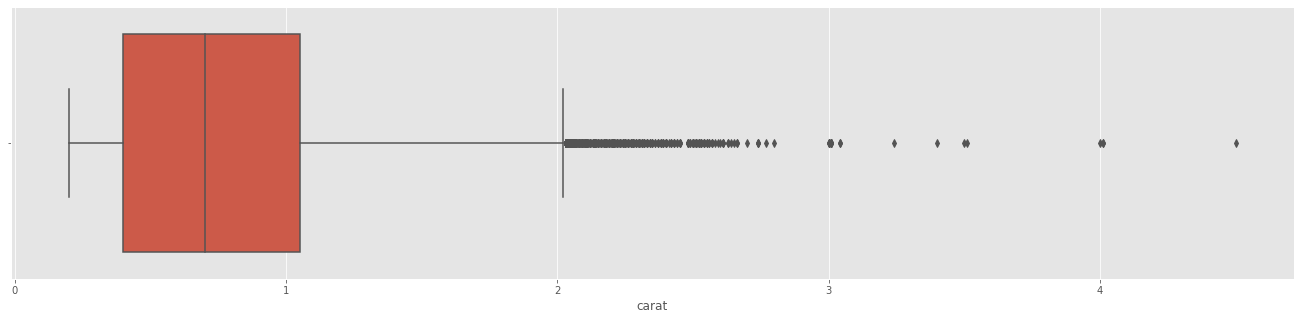

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


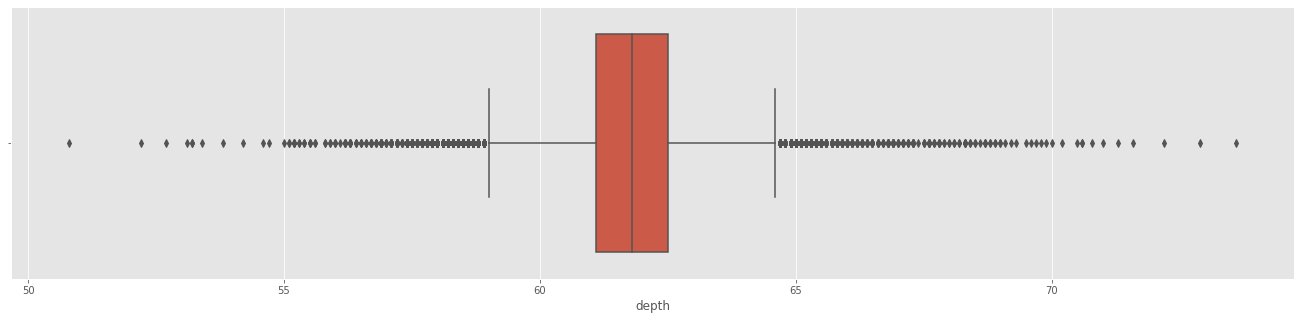

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


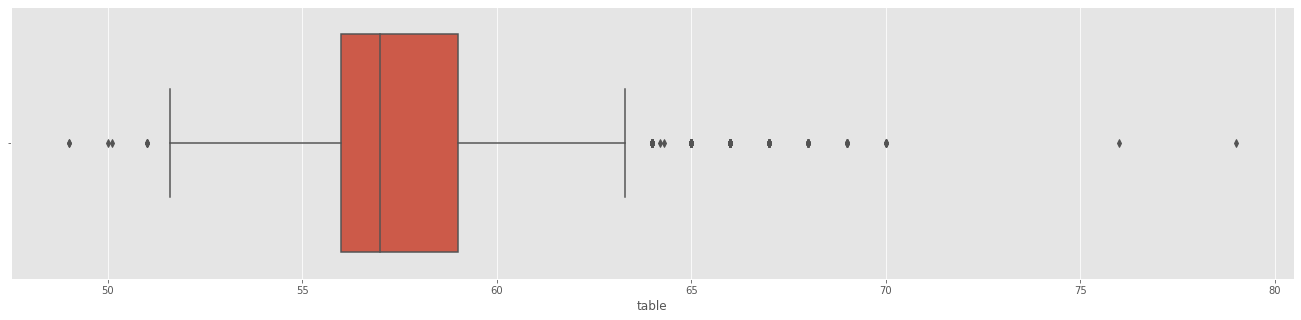

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


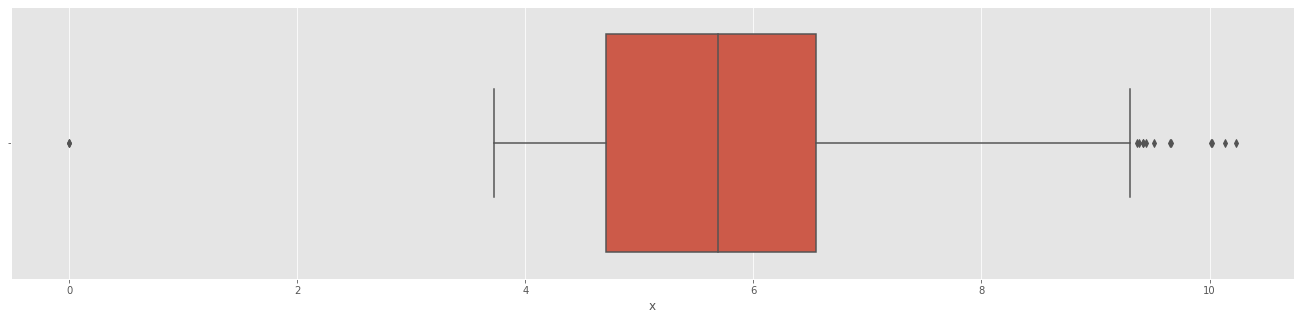

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


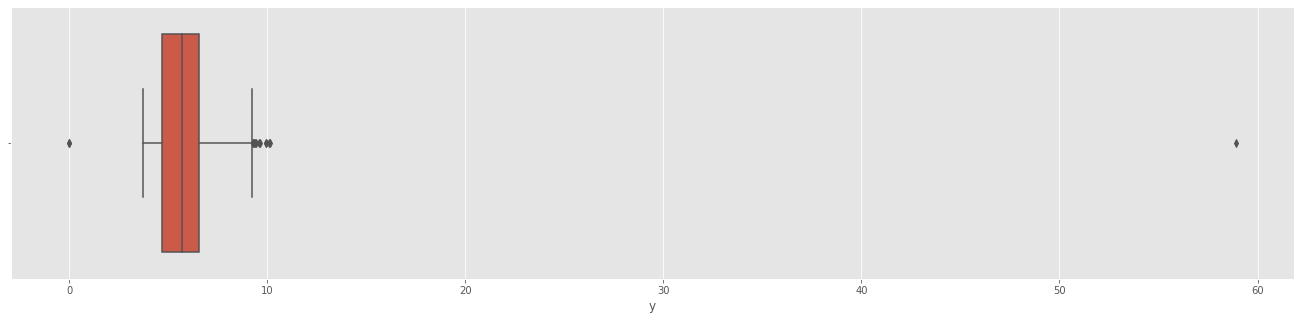

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


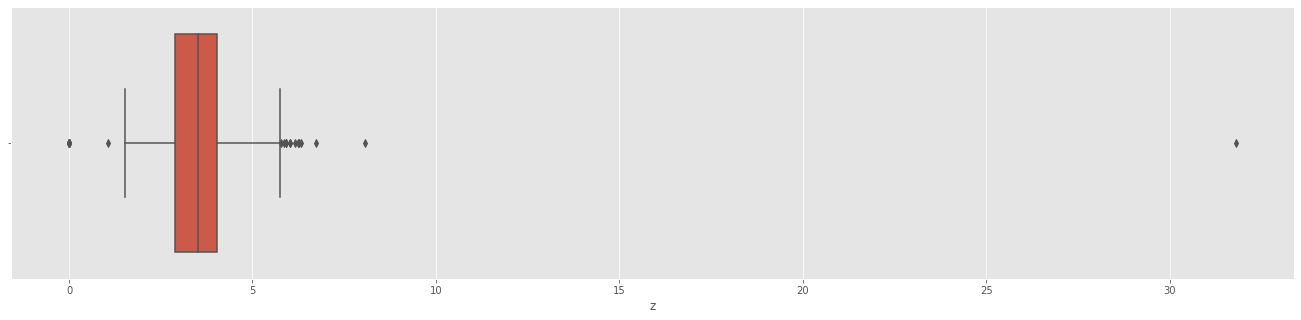

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


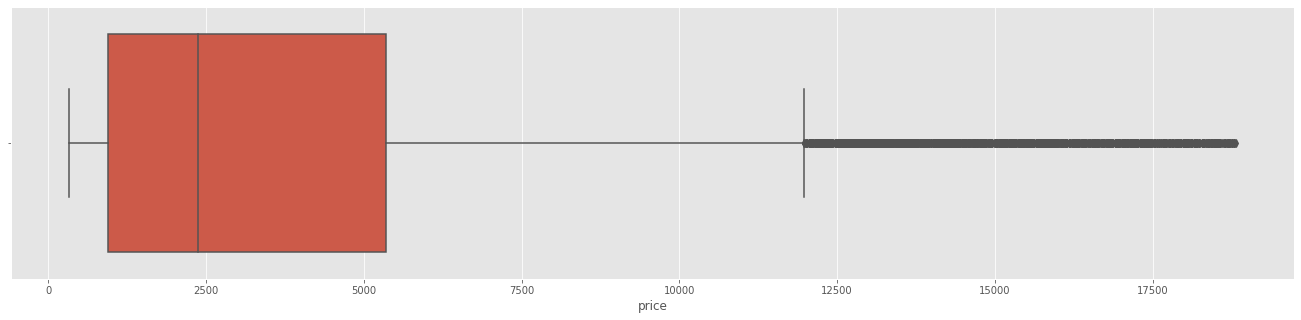

In [258]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

Outlier Removal

In [259]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [260]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


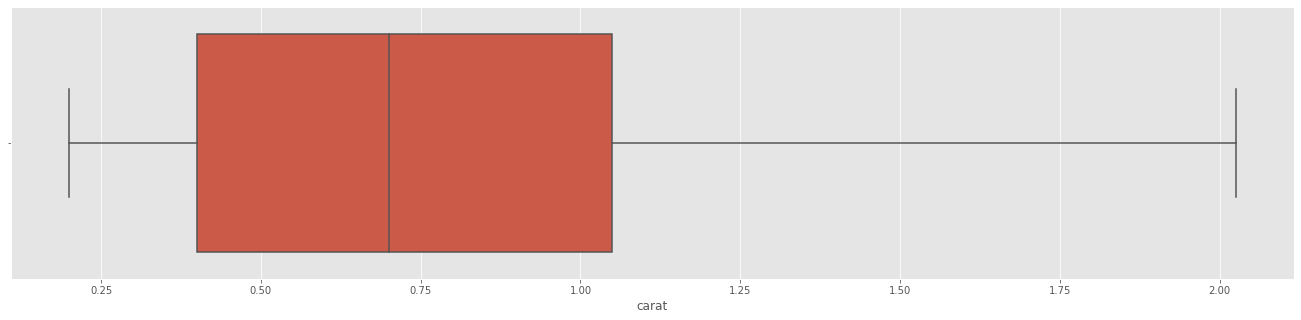

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


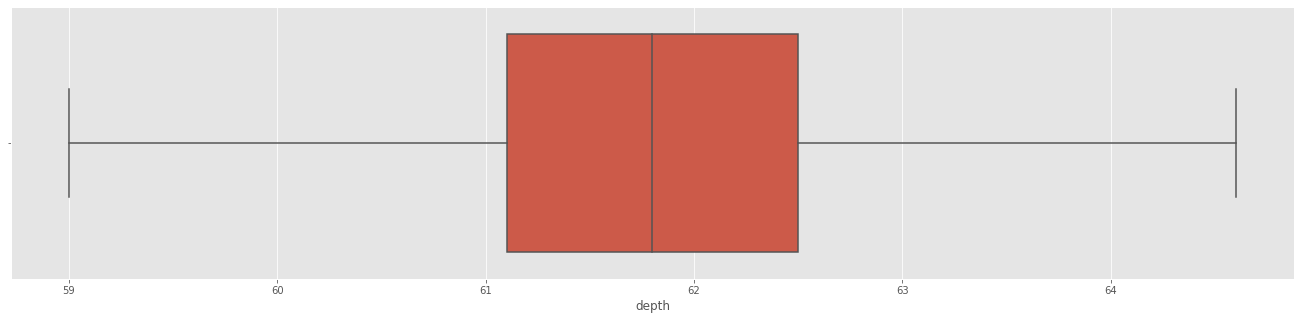

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


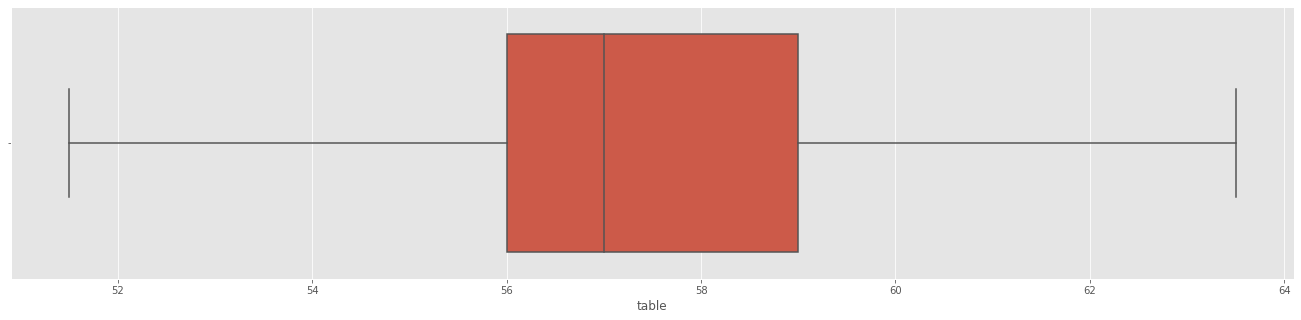

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


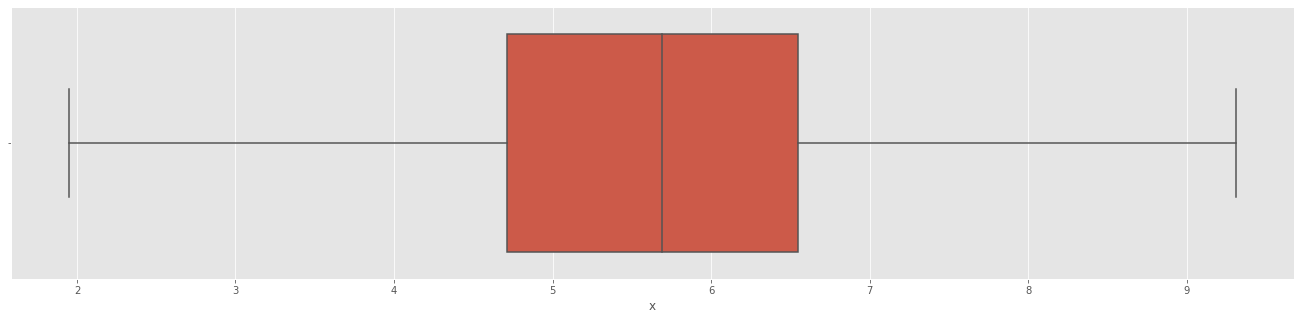

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


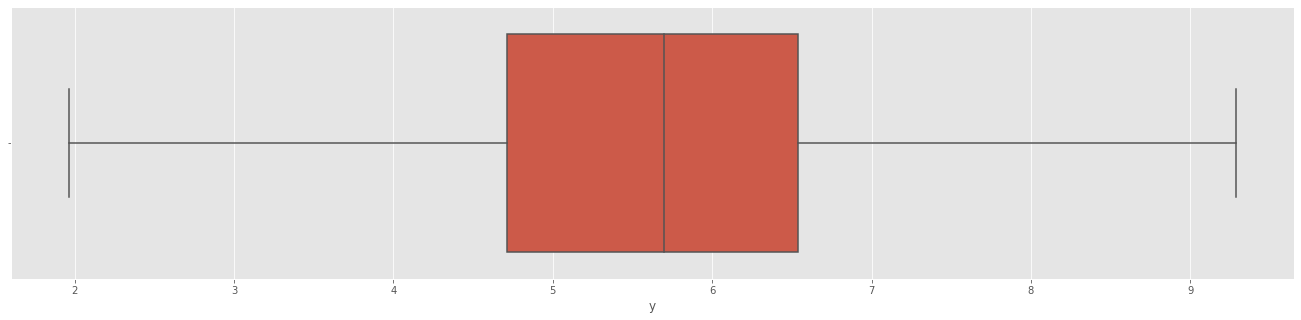

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


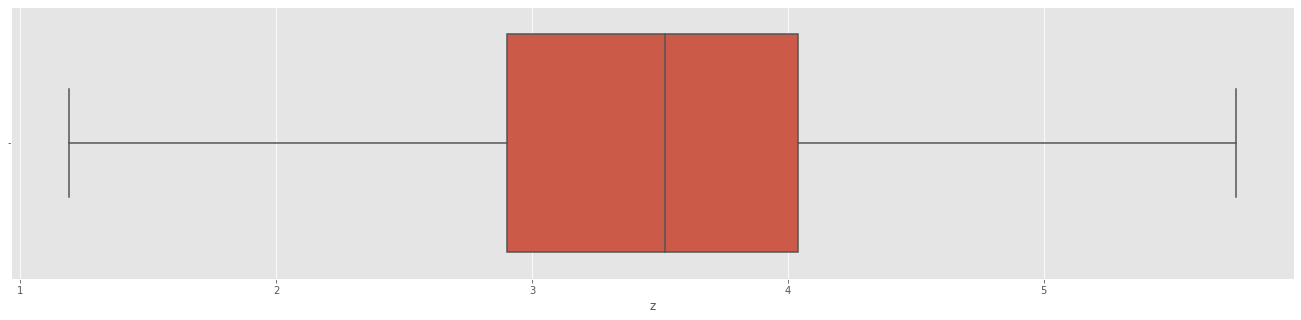

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


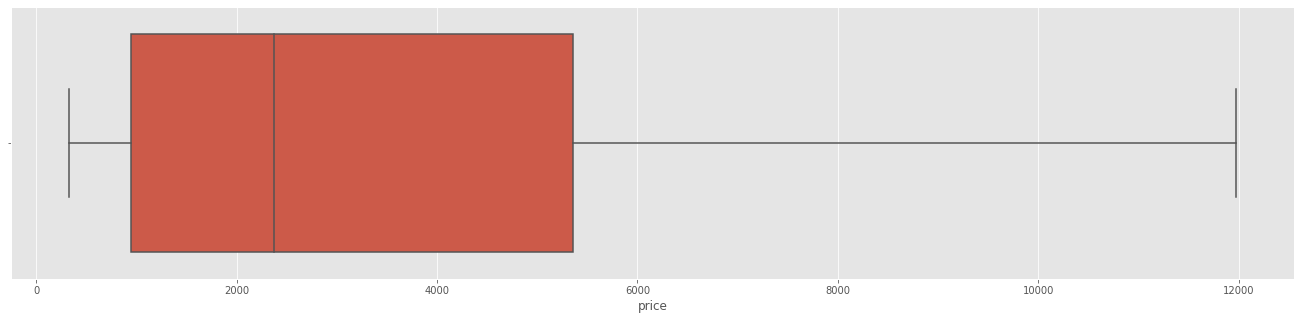

In [261]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

Skewness

In [298]:
df.skew() 

carat    1.114789
depth   -0.026422
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

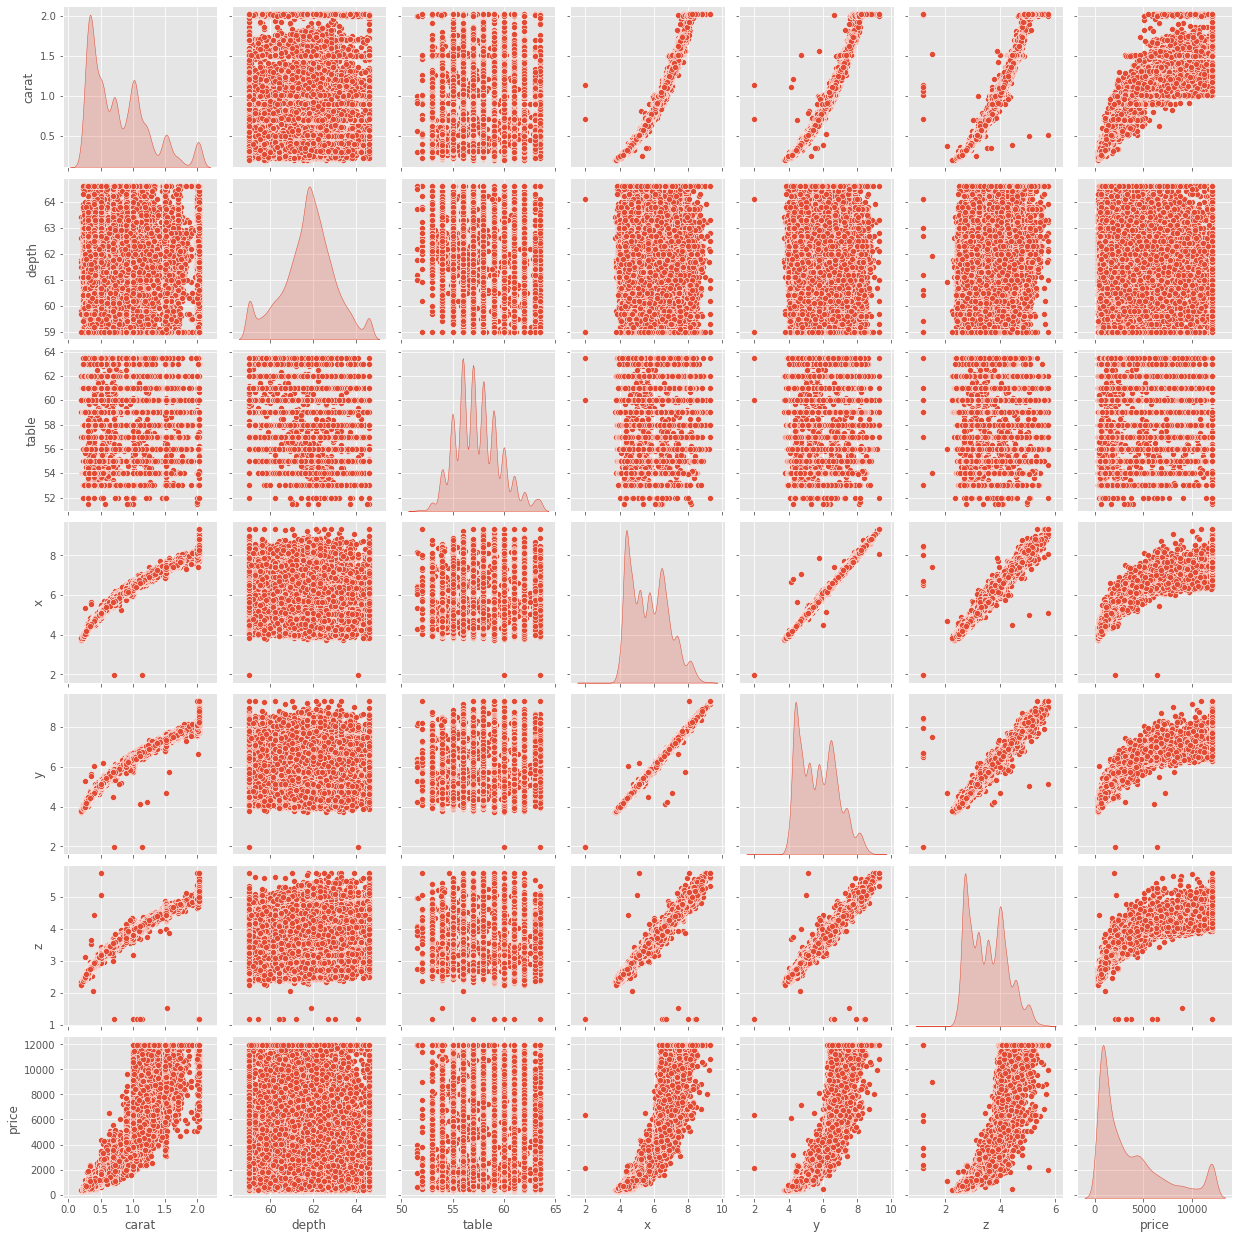

In [263]:
df_attr = ( df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

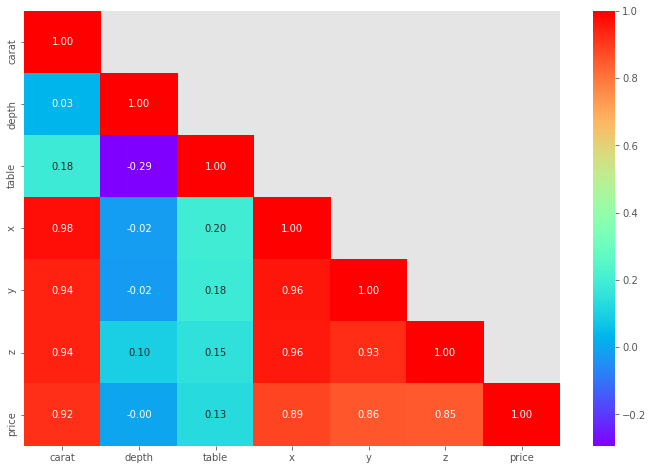

In [299]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


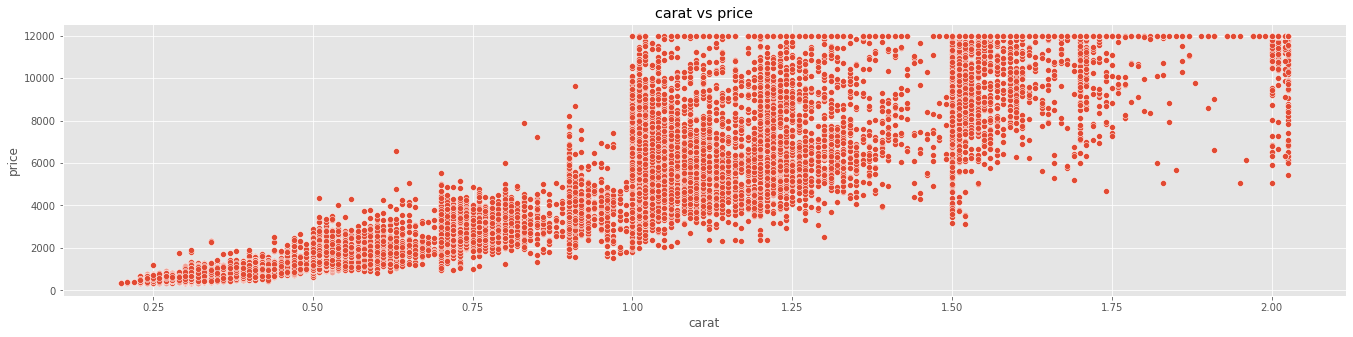

In [265]:
sns.scatterplot(df['carat'], df['price'])
plt.title('carat vs price')
plt.show()

Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


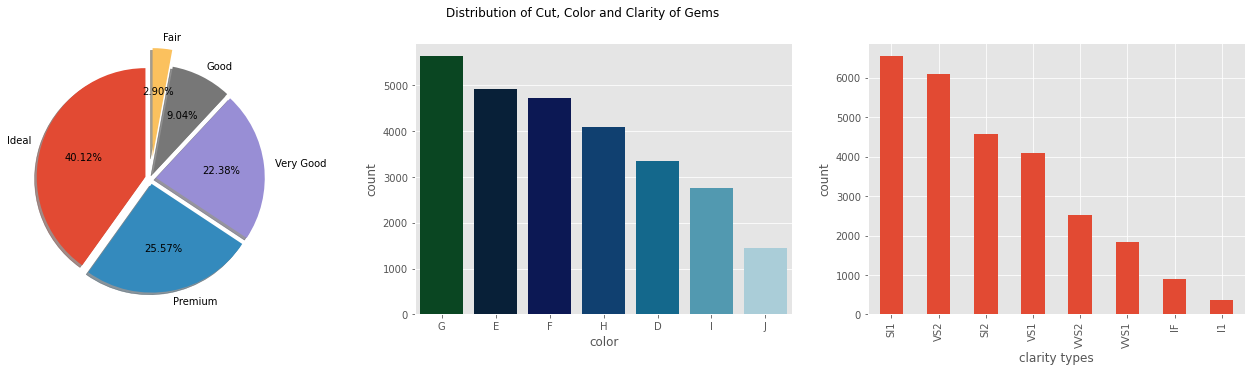

In [266]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

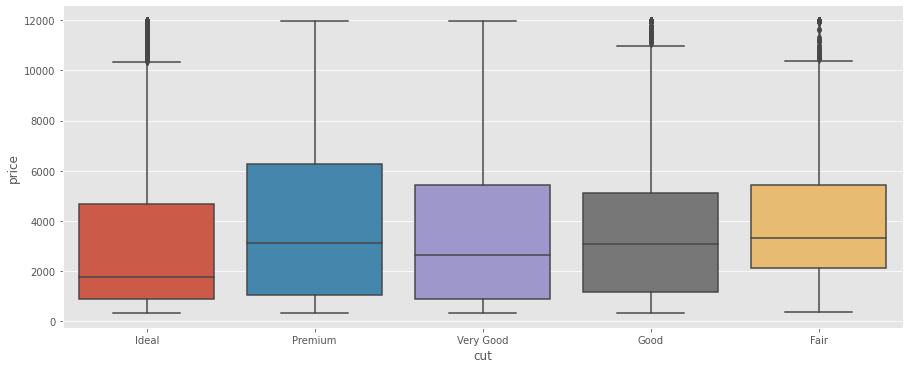

In [267]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

In [268]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [269]:
df['cut']=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))

In [270]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,E,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,4,G,7,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,E,5,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,5,F,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,5,F,6,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,G,2,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,5,H,7,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,4,E,3,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,3,F,5,61.8,56.0,4.19,4.20,2.60,682.0


In [271]:
df_1= df.drop('color', axis=1)

In [133]:
colors_dummies=pd.get_dummies(df['color'], drop_first=True)
clarity_dummies=pd.get_dummies(df['clarity'], drop_first=True)

In [134]:
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)

In [135]:
df=pd.concat([df, dummies], axis=1)

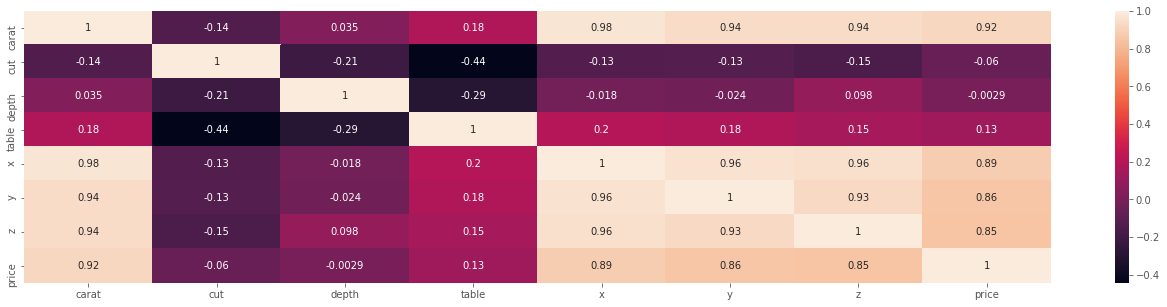

In [220]:
sns.heatmap(df.corr(), annot=True)

In [272]:
X = df_1.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df_1[['price']]
X.head()

,carat,cut,clarity,depth,table,x,y,z
0,0.30,5,2,62.1,58.0,4.27,4.29,2.66
1,0.33,4,7,60.8,58.0,4.42,4.46,2.70
2,0.90,3,5,62.2,60.0,6.04,6.12,3.78
3,0.42,5,4,61.6,56.0,4.82,4.80,2.96
4,0.31,5,6,60.4,59.0,4.35,4.43,2.65


In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [275]:
X_train.isnull().sum()

carat      0
cut        0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [277]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8276.097499383151
The coefficient for cut is 106.5563153513196
The coefficient for clarity is 401.102347194075
The coefficient for depth is -28.593365083801586
The coefficient for table is -14.24130867308618
The coefficient for x is -1410.110105749803
The coefficient for y is 1297.7562740888966
The coefficient for z is -257.0717784224888


In [279]:
regression_model.score(X_train, y_train)

0.9144653329093263

In [280]:
regression_model.score(X_test, y_test)

0.9160737026937361

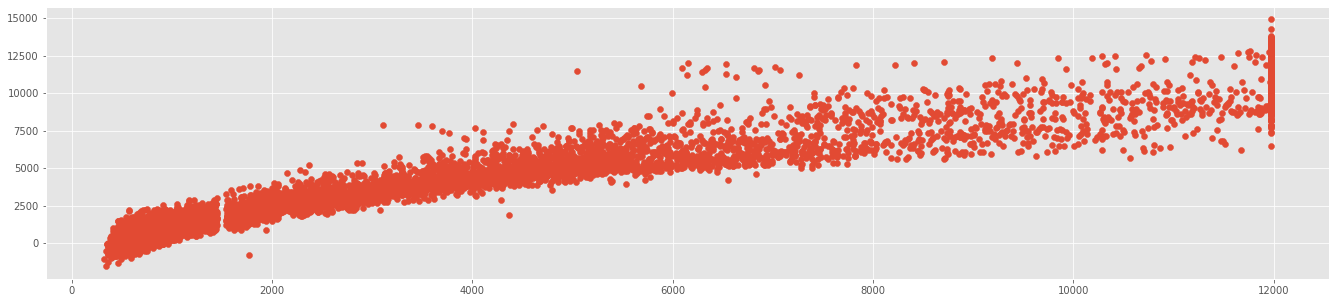

In [281]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [282]:
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1013.5702212071682

In [284]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1006.4157559359132